## Day 49 Lecture 1 Assignment

In this assignment, we will apply GMM (Gaussian Mixture Modeling) clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.special import entr

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [2]:
# answer goes here
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv'

nba_df = pd.read_csv(url)

nba_df.shape

(2141, 30)

The goal is to cluster these player-seasons to identify potential player "archetypes".  
The pre-processing steps will be identical to what we previously did for K-means.

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [3]:
# answer goes here
nba_df = nba_df.loc[(nba_df['GS']>=20)&(nba_df['MP']>=10)].reset_index(drop=True)

nba_df

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
1,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
2,2019,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
3,2019,Jarrett Allen,C,20,BRK,80,80,26.2,4.2,7.1,0.590,0.1,0.6,0.133,4.1,6.5,0.629,0.595,2.5,3.5,0.709,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9
4,2019,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,0.433,1.2,3.5,0.343,2.0,3.9,0.514,0.514,1.9,2.1,0.867,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,Deron Williams,PG,31,DAL,65,63,32.4,4.9,11.9,0.414,1.5,4.3,0.344,3.4,7.6,0.454,0.477,2.8,3.2,0.869,0.3,2.6,2.9,5.8,0.9,0.2,2.3,2.4,14.1
800,2016,Lou Williams,SG,29,LAL,67,35,28.5,4.2,10.3,0.408,1.6,4.8,0.344,2.6,5.6,0.464,0.488,5.3,6.3,0.830,0.5,2.1,2.5,2.5,0.9,0.3,1.6,1.6,15.3
801,2016,Marvin Williams,PF,29,CHO,81,81,28.9,4.2,9.2,0.452,1.9,4.7,0.402,2.3,4.6,0.504,0.554,1.5,1.8,0.833,1.6,4.9,6.4,1.4,0.7,1.0,0.8,1.6,11.7
802,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,0.514,0.1,0.4,0.233,6.7,12.8,0.523,0.518,1.4,2.2,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1


Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [4]:
# answer goes here
nba_stats = nba_df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']].copy()

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [5]:
# answer goes here
scaler = StandardScaler()

nba_stats_std = pd.DataFrame(scaler.fit_transform(nba_stats), columns=nba_stats.columns)

pca = PCA(n_components=2)
nba_stats_pca = pca.fit_transform(nba_stats_std)

Run both K-Means and Gaussian mixtures modeling twice, once with 3 cluster and once with 7 clusters. Print out the resulting means for all 4 scenarios (KM+3, GMM+3, KM+7, GMM+7). When printing the means, transform the scaled versions back into their corresponding unscaled values. 

What "archetypes" do you see? Are the archetypes identified by GMM similar to those identified by K-Means? How do the means of GMM differ from those of K-Means?

In [6]:
# answer goes here
km_3 =KMeans(n_clusters=3, random_state=123)
km_pred_3 = pd.Series(km_3.fit_predict(nba_stats_std), index=nba_stats_std.index, name='km_pred_3')

In [7]:
km_7 =KMeans(n_clusters=7, random_state=123)
km_pred_7 = pd.Series(km_7.fit_predict(nba_stats_std), index=nba_stats_std.index, name='km_pred_7')

In [8]:
gmm_3 = GaussianMixture(n_components=3, random_state=123)
gmm_3.fit(nba_stats_std)
gmm_pred_3 = pd.Series(gmm_3.predict(nba_stats_std), index=nba_stats_std.index, name='gmm_pred_3')

In [9]:
gmm_7 = GaussianMixture(n_components=7, random_state=123)
gmm_7.fit(nba_stats_std)
gmm_pred_7 = pd.Series(gmm_7.predict(nba_stats_std), index=nba_stats_std.index, name='gmm_pred_7')
gmm_7_probs = pd.DataFrame(gmm_7.predict_proba(nba_stats_std))

In [10]:
km_pred_3_clusters = pd.DataFrame(scaler.inverse_transform(km_3.cluster_centers_), columns=nba_stats.columns).rename_axis('Archtype')
km_pred_3_clusters['Count'] = km_pred_3.value_counts()
km_pred_3_clusters.sort_values('Count', ascending=False).style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
1,10.505405,3.949775,2.063739,0.804730,0.374324,1.235135,444
0,13.735359,8.605525,1.914917,0.777348,1.230387,1.668508,181
2,19.491620,5.293855,5.934078,1.354190,0.486034,2.797765,179


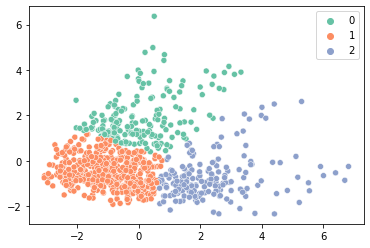

In [11]:
sns.scatterplot(x=nba_stats_pca[:,0], y=nba_stats_pca[:,1], hue=km_pred_3, palette='Set2')
plt.legend()
plt.show()

In [12]:
km_pred_7_clusters = pd.DataFrame(scaler.inverse_transform(km_7.cluster_centers_), columns=nba_stats.columns).rename_axis('Archtype')
km_pred_7_clusters['Count'] = km_pred_7.value_counts()
km_pred_7_clusters.sort_values('Count', ascending=False).style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
2,7.459322,3.474576,1.368927,0.590960,0.355367,0.881921,177
6,14.260819,3.731579,3.127485,0.835088,0.277778,1.700585,171
3,11.475839,7.273154,1.667785,0.655034,0.941611,1.389262,149
4,18.480952,4.708730,5.766667,1.338095,0.403175,2.625397,126
0,11.267778,4.897778,2.115556,1.353333,0.496667,1.287778,90
1,17.755000,10.473333,2.343333,0.921667,1.743333,2.140000,60
5,24.603226,8.374194,7.803226,1.603226,0.809677,3.941935,31


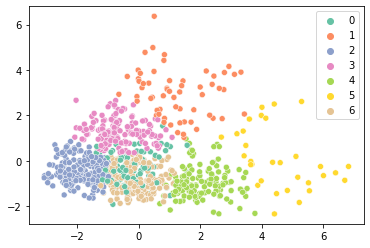

In [13]:
sns.scatterplot(x=nba_stats_pca[:,0], y=nba_stats_pca[:,1], hue=km_pred_7, palette='Set2')
plt.legend()
plt.show()

In [14]:
gmm_pred_3_clusters = pd.DataFrame(scaler.inverse_transform(gmm_3.means_), columns=nba_stats.columns).rename_axis('Archtype')
gmm_pred_3_clusters['Count'] = gmm_pred_3.value_counts()
gmm_pred_3_clusters.sort_values('Count', ascending=False).style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,10.077297,5.349306,1.455059,0.679944,0.587164,1.135985,334
2,14.586549,3.761491,3.676117,1.082628,0.317187,1.859297,318
1,17.017367,8.380519,4.265474,1.088394,1.172979,2.447641,152


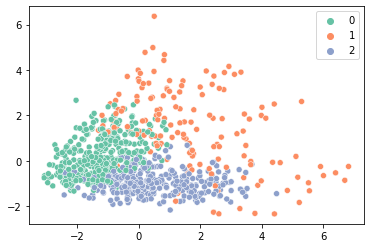

In [15]:
sns.scatterplot(x=nba_stats_pca[:,0], y=nba_stats_pca[:,1], hue=gmm_pred_3, palette='Set2')
plt.legend()
plt.show()

In [16]:
gmm_pred_7_clusters = pd.DataFrame(scaler.inverse_transform(gmm_7.means_), columns=nba_stats.columns).rename_axis('Archtype')
gmm_pred_7_clusters['Count'] = gmm_pred_7.value_counts()
gmm_pred_7_clusters.sort_values('Count', ascending=False).style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
5,7.485365,3.558747,1.321525,0.648597,0.417625,0.877181,145
4,14.032070,5.346714,1.904683,0.985949,0.413712,1.424173,143
6,17.141584,4.328236,5.053344,1.289049,0.403331,2.341578,143
2,12.091849,2.855989,3.454533,0.831385,0.165511,1.623304,125
0,10.114260,6.807969,1.386872,0.642907,0.984344,1.263793,119
1,16.975225,9.479786,2.920301,0.845767,1.333072,2.125263,93
3,21.193055,7.828010,7.281237,1.658198,0.886209,3.574253,36


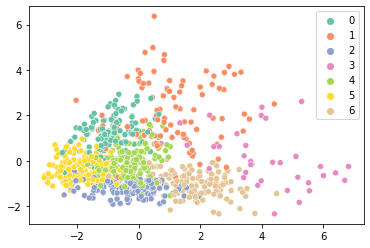

In [17]:
sns.scatterplot(x=nba_stats_pca[:,0], y=nba_stats_pca[:,1], hue=gmm_pred_7, palette='Set2')
plt.legend()
plt.show()

Predict the likelihood of each player belonging to one of the 3 clusters using the GMM model. Then, calculate the entropy for each set of predicted probabilities. 

We will use entropy as a measure of how confident we are in the predicted class label. If we had no confidence in our prediction, we would assign 33% probability to each class, while if we were totally confident, we would assign 100% to one class. Entropy would be at a maximum in the "no confidence" scenario and a minimum in the "full confidence" scenario, which makes it a reasonable way to quantify our uncertainty in our prediction. There are certainly other methods as well; feel free to experiment with them if desired.

Which five predicted labels are we least confident about? Which five are we most confident about? Print out the associated details (season, player name, stats, etc.) from those players.

In [18]:
gmm_3_probs = pd.DataFrame(gmm_3.predict_proba(nba_stats_std))
gmm_3_table = pd.concat([nba_stats, gmm_pred_3, gmm_3_probs],1)

In [19]:
gmm_3_table['entropy'] = [entr(x).sum() for x in gmm_3.predict_proba(nba_stats_std)]

In [23]:
gmm_3_table.sort_values('entropy', ascending=False).head(10)

,PTS,TRB,AST,STL,BLK,TOV,gmm_pred_3,0,1,2,entropy
356,12.9,3.5,2.9,1.5,0.9,1.7,2,0.136751,0.350242,0.513007,0.981944
13,11.5,4.6,2.9,0.4,0.5,1.5,2,0.139964,0.143889,0.716147,0.793280
564,10.2,3.2,2.6,1.1,0.7,1.2,0,0.555385,0.028077,0.416537,0.791727
741,12.0,5.5,1.9,0.9,0.5,2.1,2,0.398160,0.026710,0.575131,0.781566
199,12.6,6.5,2.5,1.5,0.4,1.5,0,0.554207,0.011763,0.434030,0.741623
195,18.1,4.8,2.5,1.0,0.7,1.9,2,0.346173,0.016607,0.637220,0.722438
343,11.5,5.7,2.7,0.8,0.5,1.9,0,0.739839,0.062648,0.197513,0.716835
676,3.2,3.9,1.6,0.7,0.3,0.4,2,0.488259,0.004100,0.507641,0.716743
675,19.5,5.3,2.5,0.8,0.4,1.5,0,0.565449,0.003027,0.431524,0.702608
593,6.7,5.8,1.2,1.4,0.2,0.8,0,0.613622,0.006551,0.379826,0.700306


In [21]:
least_confident_5 = gmm_3_table.sort_values('entropy', ascending=False).head().index

In [22]:
nba_df.loc[least_confident_5].style.background_gradient()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
356,2018,Josh Richardson,SF,24,MIA,81,81,33.200000,4.900000,10.900000,0.451000,1.600000,4.100000,0.378000,3.400000,6.800000,0.495000,0.523000,1.500000,1.800000,0.845000,0.900000,2.700000,3.500000,2.900000,1.500000,0.900000,1.700000,2.500000,12.900000
13,2019,Will Barton,SG,28,DEN,43,38,27.700000,4.300000,10.700000,0.402000,1.600000,4.600000,0.342000,2.700000,6.100000,0.447000,0.475000,1.300000,1.700000,0.770000,0.700000,3.900000,4.600000,2.900000,0.400000,0.500000,1.500000,1.900000,11.500000
564,2017,Josh Richardson,SG,23,MIA,53,34,30.500000,3.800000,9.700000,0.394000,1.400000,4.300000,0.330000,2.400000,5.400000,0.444000,0.467000,1.100000,1.500000,0.779000,0.700000,2.500000,3.200000,2.600000,1.100000,0.700000,1.200000,2.500000,10.200000
741,2016,Markieff Morris,PF,26,TOT,64,45,25.500000,4.800000,11.200000,0.425000,0.700000,2.400000,0.303000,4.000000,8.800000,0.458000,0.458000,1.700000,2.300000,0.735000,1.100000,4.400000,5.500000,1.900000,0.900000,0.500000,2.100000,2.900000,12.000000
199,2019,Thaddeus Young,PF,30,IND,81,81,30.700000,5.500000,10.400000,0.527000,0.600000,1.800000,0.349000,4.800000,8.600000,0.564000,0.557000,1.100000,1.700000,0.644000,2.400000,4.100000,6.500000,2.500000,1.500000,0.400000,1.500000,2.400000,12.600000
